Consignas
1) Barrer una lista de más de 150 ítems ids en el servicio público:
https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json
En este caso particular y solo a modo de ejemplo, son resultados para la búsqueda
“chromecast”, pero deberás elegir otros términos para el experimento que permitan
enriquecer el análisis en un hipotético dashboard (ejemplo Google Home, Apple TV,
Amazon Fire TV, o afines para poder comparar dispositivos portátiles, o bien elegir
otros 3 que te interesen para comparar).
2) Por cada resultado, realizar el correspondiente GET por Item_Id al recurso público:
https://api.mercadolibre.com/items/{Item_Id}
3) Escribir los resultados en un archivo plano delimitado por comas, desnormalizando
el JSON obtenido en el paso anterior, en tantos campos como sea necesario para
guardar las variables que te interesen modelar

In [9]:
import requests
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## chromecast

In [10]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_chromecast = df.price.median()
amount_median_chromecast = df.amount.median()
rate_median_chromecast = df.rate.median()

## Tv Apple

In [11]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=TV Apple&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_tvApple = df.price.median()
amount_median_tvApple = df.amount.median()
rate_median_tvApple = df.rate.median()

## Amazon Fire TV

In [12]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Amazon Fire TV&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_amazonFireTv = df.price.median()
amount_median_amazonFireTv = df.amount.median()
rate_median_amazonFireTv = df.rate.median()

In [33]:
serie_class = pd.Series(['Chromecast','Tv Apple','Amazon Fire TV'])
serie_price_median = pd.Series([price_median_chromecast,price_median_tvApple,price_median_amazonFireTv])
serie_amount_median = pd.Series([amount_median_chromecast,amount_median_tvApple,amount_median_amazonFireTv])
serie_rate_median = pd.Series([rate_median_chromecast,rate_median_tvApple,rate_median_amazonFireTv])

In [36]:
df_price = pd.DataFrame({'products':serie_class,'values':serie_price_median})
df_price['type'] = 'price'
df_price

In [41]:
df_amount = pd.DataFrame({'products':serie_class,'values':serie_amount_median})
df_amount['type'] = 'amount'
df_amount

,products,values,type
0,Chromecast,1041.035,amount
1,Tv Apple,2231.910,amount
2,Amazon Fire TV,1559.750,amount


In [42]:
df_rate = pd.DataFrame({'products':serie_class,'values':serie_rate_median})
df_rate['type'] = 'rate'
df_rate

,products,values,type
0,Chromecast,70.17,rate
1,Tv Apple,70.17,rate
2,Amazon Fire TV,70.17,rate


In [44]:
df = pd.concat([df_price,df_amount,df_rate],axis=0)

## Comparativa Dispositivos Moviles

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


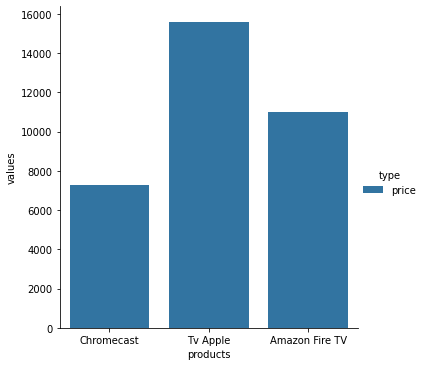

In [49]:
sns.factorplot(x='products', y='values', hue='type', data=df_price, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


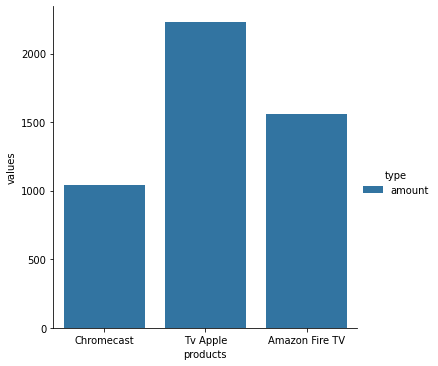

In [53]:
sns.factorplot(x='products', y='values', hue='type',data=df_amount, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


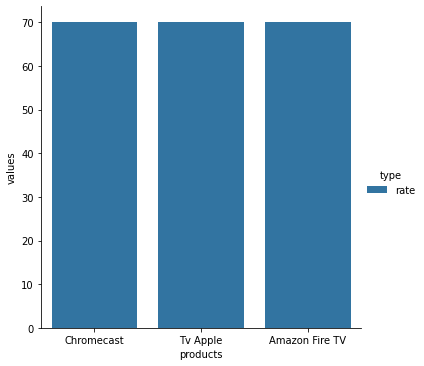

In [54]:
sns.factorplot(x='products', y='values', hue='type', data=df_rate, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


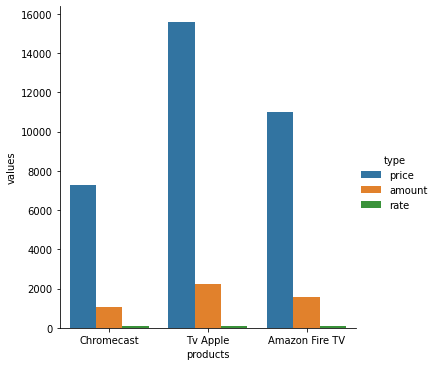

In [55]:
sns.factorplot(x='products', y='values', hue='type', data=df, kind='bar')

# 2

In [148]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

In [150]:
for indx, i in enumerate(df['id']):
    print(indx)
    if indx==0:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df['id'] = json_get['id']
        df['site_id'] = json_get['site_id']
        df['title'] = json_get['title']
        df['subtitle'] = json_get['subtitle']
        df['seller_id'] = json_get['seller_id']
        df['category_id'] = json_get['category_id']
        df['official_store_id'] = json_get['official_store_id']
        df['price'] = json_get['price']
        df['base_price'] = json_get['base_price']
        df['original_price'] = json_get['original_price']
        df['currency_id'] = json_get['currency_id']
        df['initial_quantity'] = json_get['initial_quantity']
        df['available_quantity'] = json_get['available_quantity']
        df['sold_quantity'] = json_get['sold_quantity']
    else:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df_aux = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df_aux['id'] = json_get['id']
        df_aux['site_id'] = json_get['site_id']
        df_aux['title'] = json_get['title']
        df_aux['subtitle'] = json_get['subtitle']
        df_aux['seller_id'] = json_get['seller_id']
        df_aux['category_id'] = json_get['category_id']
        df_aux['official_store_id'] = json_get['official_store_id']
        df_aux['price'] = json_get['price']
        df_aux['base_price'] = json_get['base_price']
        df_aux['original_price'] = json_get['original_price']
        df_aux['currency_id'] = json_get['currency_id']
        df_aux['initial_quantity'] = json_get['initial_quantity']
        df_aux['available_quantity'] = json_get['available_quantity']
        df_aux['sold_quantity'] = json_get['sold_quantity']
        
        df = pd.concat([df,df_aux],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [152]:
df.to_csv('get_data_process.csv',sep='|',index=False)